In [ ]:
import pandas as pd
import numpy as np
import pacmap
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score, adjusted_mutual_info_score


In [ ]:
%pip install pacmap
# para reducir la dimensionalidad

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 30.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 57.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 MB 30.6 MB/s eta 0:00:00
  Created wheel for annoy: filename=annoy-1.17.3-cp39-cp39-linux_x86_64.whl size=519759 sha256=61dcc5a454d06e91308edafe477ce998a5278f7879b0e9fe75ac550bef1b793d
  Stored in directory: /root/.cache/pip/wheels/09/a9/54/37478e65995fe712f7da465749da9ddb21db6b1a599d591ac7
Successfully built annoy

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
data = pd.read_csv("/work/dataset_tissue.txt", sep=",")
clase = pd.read_csv("/work/clase.txt")

In [ ]:
# procesamiento de datos
target = clase['x'].values

# etiquetado
label_num = {label: i for i, label in enumerate(np.unique(target))}
labels_true = np.vectorize(label_num.get)(target)

X = np.array(data.iloc[:, 1:]).T
X.shape

(189, 22215)

In [ ]:
data.describe()

,GSM11805.CEL.gz,GSM11814.CEL.gz,GSM11823.CEL.gz,GSM11830.CEL.gz,GSM12067.CEL.gz,GSM12075.CEL.gz,GSM12079.CEL.gz,GSM12098.CEL.gz,GSM12105.CEL.gz,GSM12268.CEL.gz,...,GSM323527.CEL.gz,GSM323565.CEL.gz,GSM323566.CEL.gz,GSM323567.CEL.gz,GSM246492.CEL.gz,GSM246493.CEL.gz,GSM246494.CEL.gz,GSM307639.CEL.gz,GSM307640.CEL.gz,GSM307641.CEL.gz
count,22215.000000,22215.000000,22215.000000,22215.000000,22215.000000,22215.000000,22215.000000,22215.000000,22215.000000,22215.000000,...,22215.000000,22215.000000,22215.000000,22215.000000,22215.000000,22215.000000,22215.000000,22215.000000,22215.000000,22215.000000
mean,7.409846,7.407811,7.384573,7.426581,7.401097,7.393245,7.392725,7.385564,7.408332,7.402445,...,7.412956,7.410084,7.408582,7.414650,7.391032,7.399572,7.391870,7.424121,7.397443,7.395087
std,1.827500,1.844949,1.802054,1.780400,1.792745,1.784335,1.751411,1.797687,1.819420,1.803367,...,1.806830,1.816644,1.828750,1.859744,1.885683,1.835956,1.835241,1.830004,1.785327,1.828298
min,4.285722,4.265839,4.233613,4.238971,4.173531,4.274241,4.216112,4.209053,4.184890,4.156745,...,4.284566,4.273771,4.243018,4.287890,4.276072,4.283810,4.252264,4.350859,4.396927,4.318058
25%,5.992389,5.978839,5.998700,6.061792,6.030482,6.026677,6.062608,6.001481,6.003598,6.017176,...,6.013380,5.996433,5.967216,5.943009,5.940509,6.017116,5.984979,5.983980,5.995976,5.969155
50%,7.146836,7.139106,7.168192,7.249130,7.205835,7.180885,7.209657,7.174708,7.174499,7.183477,...,7.176284,7.169048,7.158114,7.130060,7.031669,7.095193,7.125163,7.145765,7.132062,7.096557
75%,8.560430,8.572895,8.496700,8.535270,8.507570,8.487838,8.490164,8.481192,8.548720,8.513388,...,8.554637,8.541626,8.603323,8.632424,8.571648,8.452651,8.526088,8.554817,8.493547,8.525198
max,14.228823,14.297056,14.314367,14.415677,14.390297,14.295821,14.270840,14.266422,14.270613,14.291597,...,14.298512,14.250191,14.128730,14.180143,14.408205,14.430288,14.421938,14.329335,14.312748,14.330552


In [ ]:
data.shape

(22215, 190)

# Reduccion de la dimensionalidad

In [ ]:
# SVD
# from sklearn.decomposition import TruncatedSVD
# reduccion de la dimensionalidad con TrucnatedSVD

X_svd = TruncatedSVD(184).fit_transform(X)
X_svd.shape


# PCA
# from sklearn.decomposition import PCA

X_pca = PCA(n_components=0.99999).fit_transform(X)
X_pca.shape




(189, 184)

## PaCMAP

In [ ]:
embedding = pacmap.PaCMAP(random_state=42) # creacion de la instancia PacMAP
X_pacmap = embedding.fit_transform(X) # reduccion
X_pacmap.shape

/usr/local/lib/python3.9/site-packages/pacmap/pacmap.py:819: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


(189, 2)

In [ ]:
# constantes

cluster_colors =  ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00', '#FFFF33', '#A65628']
labels = ['cerebellum', 'colon', 'endometrium', 'hippocampus', 'kidney', 'liver', 'placenta']


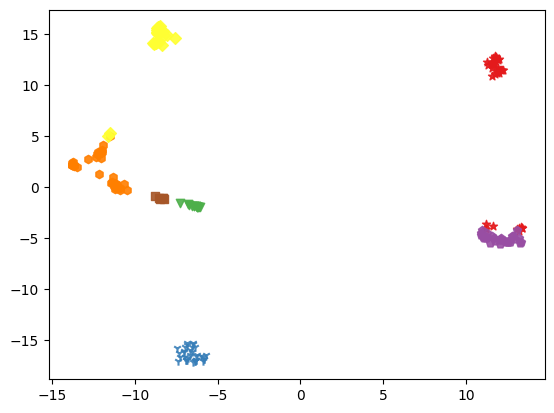

In [ ]:
for idx, (label, color, marker) in enumerate(zip(labels, cluster_colors, ["*", "1", "v", "p", "h", "D", "s"])):
    plt.scatter(
        X_pacmap[target == label, 0],
        X_pacmap[target == label, 1],
        color=color,
        label=f'cluster {idx}',
        alpha=0.9,
        marker=marker
    )


# Definimos las funciones a usar

In [ ]:
# imprimir clusters

def printCluster(target, prediction):
    cluster_element = {i: list(np.unique(prediction[np.where(target == i)])) for i in np.unique(target)}
    for key, value in cluster_element.items():
        print(f"{key}: {value}")

In [ ]:
# obtener scores

def getScores(labels_true, prediction_pca, prediction_svd, X_pca, X_svd):
    methods = ["PCA", "SVD"]
    predictions = [prediction_pca, prediction_svd]
    data_methods = [X_pca, X_svd]
    scores = {}
    for method, prediction, data in zip(methods, predictions, data_methods):
        scores[method] = [
            silhouette_score(data, prediction),
            rand_score(labels_true, prediction),
            adjusted_rand_score(labels_true, prediction),
            adjusted_mutual_info_score(labels_true, prediction)
        ]
    df_scores = pd.DataFrame.from_dict(scores, orient="index", columns=["Silhouette", "Rand", "Adjust Rand", "Adjust Mutual Information"])
    return df_scores


In [ ]:
# ver clusters

def graph(predictions_pca, predictions_svd, X, cluster_colors):
    embedding = pacmap.PaCMAP(random_state=42)
    X_pacmap_transformed = embedding.fit_transform(X)
    fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=200)
    methods = ["PCA", "SVD"]
    for ax, predictions, method in zip(axes, [predictions_pca, predictions_svd], methods):
        for l, c, m in zip(range(7), cluster_colors, ["*", "1", "v", "p", "h", "D", "s"]):
            ax.scatter(X_pacmap_transformed[predictions == l, 0], X_pacmap_transformed[predictions == l, 1], color=c, label=f'cluster {l}', alpha=0.9, marker=m)
        ax.set_title(f"{method} Visualization")
    plt.tight_layout()
    plt.show()

In [ ]:
# para los diferentes algoritmos de clustering

methods = ["PCA", "SVD"]
data_transformed_list = [X_pca, X_svd]

# GMM

### Definir GMM

In [ ]:
predictions_gmm = []
for method, data_transformed in zip(methods, data_transformed_list):
    gm_model = GaussianMixture(n_components=7).fit(data_transformed)
    predictions = gm_model.predict(data_transformed)
    predictions_gmm.append(predictions)
    print(method)
    printCluster(target, predictions)


PCA
cerebellum: [1, 4]
colon: [3]
endometrium: [4]
hippocampus: [1]
kidney: [2, 6]
liver: [5]
placenta: [0]
SVD
cerebellum: [1, 3]
colon: [0]
endometrium: [4]
hippocampus: [5]
kidney: [4]
liver: [2]
placenta: [6]


In [ ]:
# scores

df_gmm_scores = getScores(labels_true, predictions_gmm[0], predictions_gmm[1], X_pca, X_svd)
print(df_gmm_scores)

     Silhouette      Rand  Adjust Rand  Adjust Mutual Information
PCA    0.332138  0.911235     0.706621                   0.870707
SVD    0.328838  0.957785     0.854527                   0.926777


/usr/local/lib/python3.9/site-packages/pacmap/pacmap.py:819: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


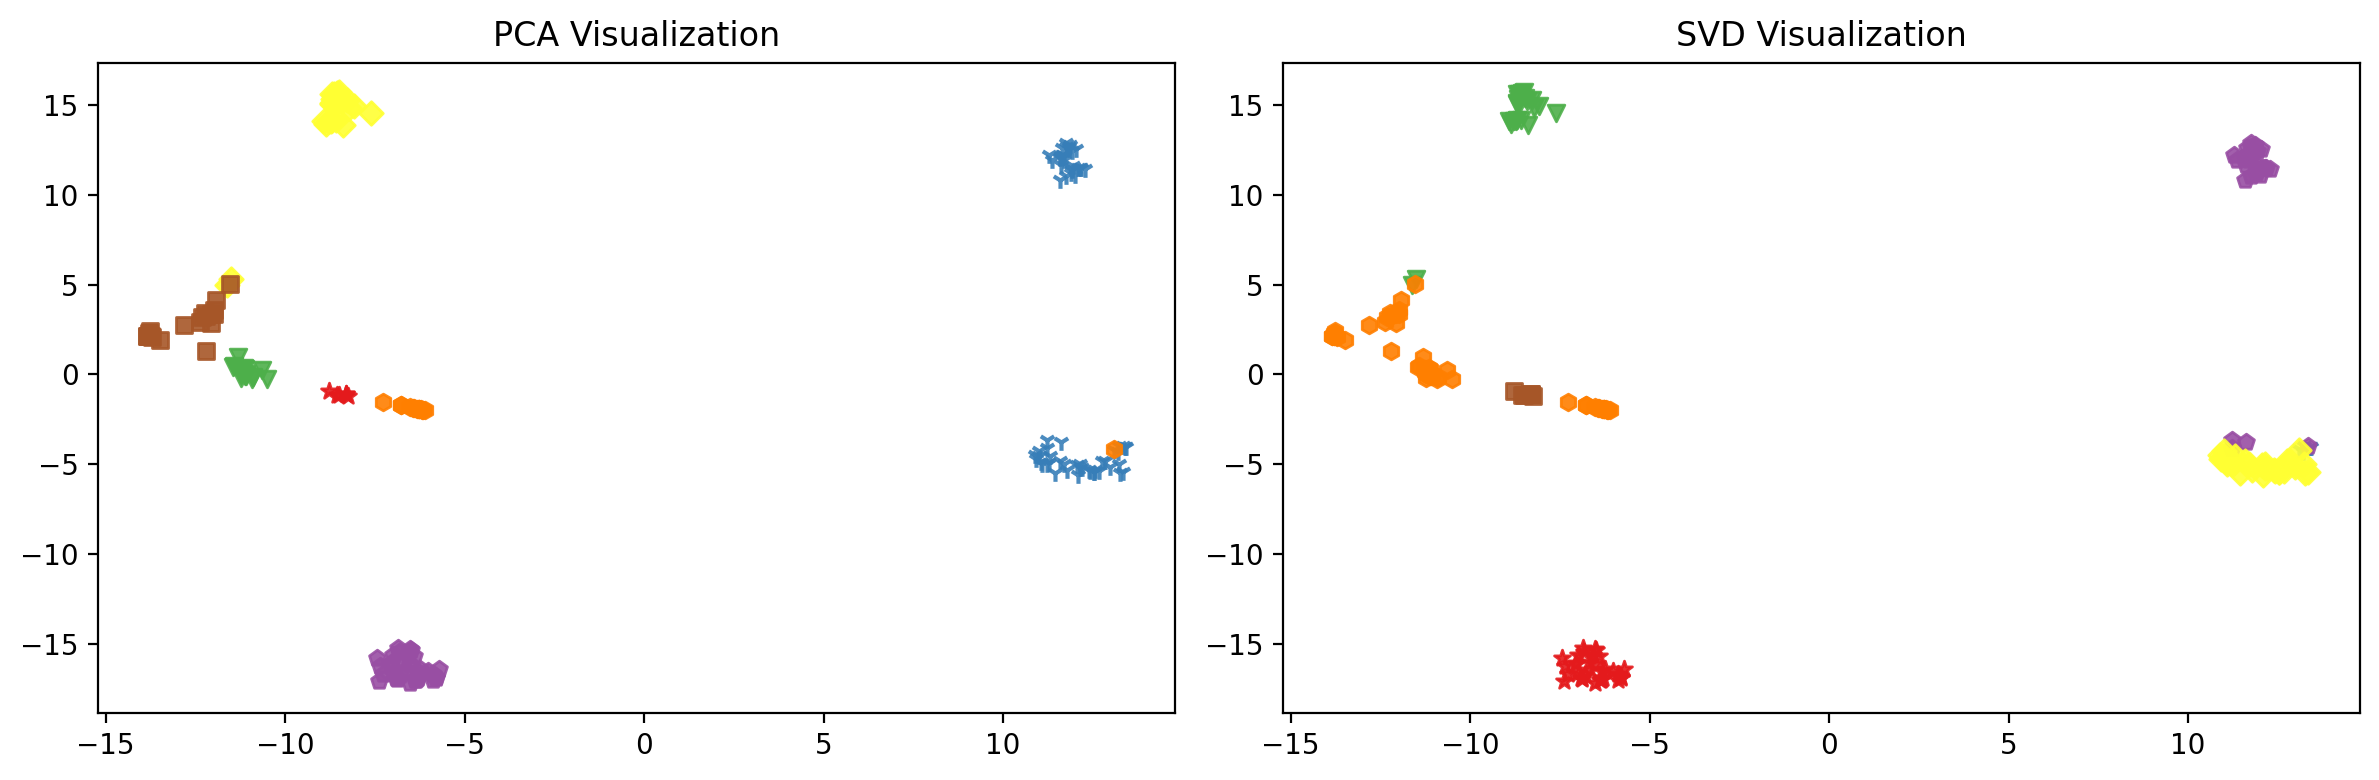

In [ ]:
graph(predictions_gmm[0], predictions_gmm[1], X, cluster_colors)

##

# K-Means

## Definir KMeans

In [ ]:
predictions_kmeans = []

for method, data_transformed in zip(methods, data_transformed_list):
    kmeans_model = KMeans(n_clusters=7, random_state=0).fit(data_transformed)
    predictions = kmeans_model.predict(data_transformed)
    predictions_kmeans.append(predictions)
    print(method)
    printCluster(target, predictions)

PCA
cerebellum: [2, 6]
colon: [3]
endometrium: [1]
hippocampus: [2]
kidney: [4]
liver: [0]
placenta: [5]
SVD
cerebellum: [2, 6]
colon: [3]
endometrium: [1]
hippocampus: [2]
kidney: [4]
liver: [0]
placenta: [5]


In [ ]:
# scores

df_kmeans_scores = getScores(labels_true, predictions_kmeans[0], predictions_kmeans[1], X_pca, X_svd)
print(df_kmeans_scores)

     Silhouette      Rand  Adjust Rand  Adjust Mutual Information
PCA    0.323172  0.981988     0.934247                    0.95526
SVD    0.323239  0.981988     0.934247                    0.95526


/usr/local/lib/python3.9/site-packages/pacmap/pacmap.py:819: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


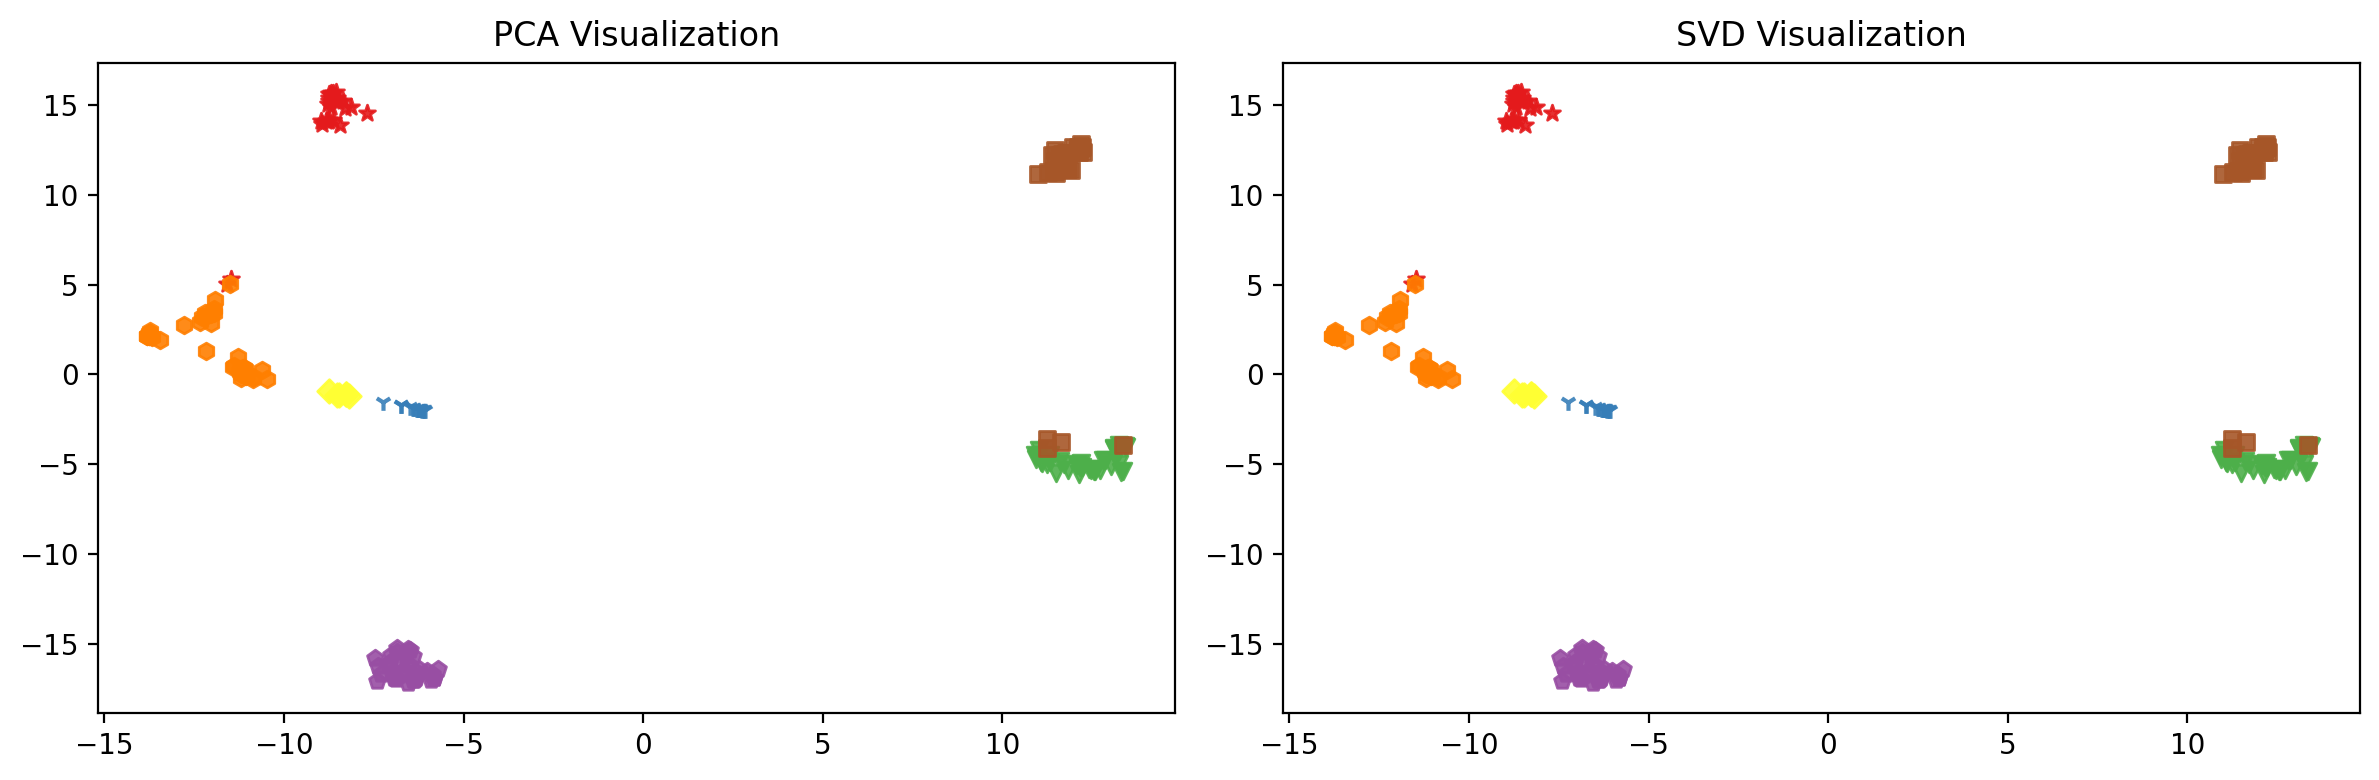

In [ ]:
graph(predictions_kmeans[0], predictions_kmeans[1], X, cluster_colors)

## Implementación KMeans (desde 0)

In [ ]:
def Init_Centroide(dataset, k):
    return dataset[np.random.choice(dataset.shape[0], k, replace=False), :]

def getMinDistance(dataset, centroide):
    distances = euclidean_distances(dataset, centroide)
    return np.argmin(distances, axis=1)

def getMeans(dataset, grupos, k):
    centroides = np.array([dataset[grupos == i].mean(axis=0) for i in range(k)])
    return centroides

def kmean(dataset, k=2, n_iter=1000):
    centroides = Init_Centroide(dataset, k)
    for _ in range(n_iter):
        grupos = getMinDistance(dataset, centroides)
        centroides = getMeans(dataset, grupos, k)
    return centroides, grupos


centroides_pca, labels_pca = kmean(X_pca, k=7)
centroides_svd, labels_svd = kmean(X_svd, k=7)

print("PCA")
printCluster(target, labels_pca)
print("SVD")
printCluster(target, labels_svd)

# scores
df_scores_kmeans_custom = getScores(labels_true, labels_pca, labels_svd, X_pca, X_svd)
df_scores_kmeans_custom


PCA
cerebellum: [1, 3]
colon: [2, 6]
endometrium: [1]
hippocampus: [3]
kidney: [5]
liver: [0]
placenta: [4]
SVD
cerebellum: [1, 6]
colon: [5]
endometrium: [4]
hippocampus: [2]
kidney: [0, 4]
liver: [0, 3]
placenta: [5]


,Silhouette,Rand,Adjust Rand,Adjust Mutual Information
PCA,0.264269,0.914274,0.715172,0.858022
SVD,0.274136,0.936452,0.782066,0.863332


# DBSCAN

## Definición

In [ ]:
predictions_dbscan = []
for method, data_transformed in zip(methods, data_transformed_list):
    dbscan_model = DBSCAN(eps=90, min_samples=3).fit(data_transformed)
    predictions = dbscan_model.labels_
    predictions_dbscan.append(predictions)
    print(method)
    printCluster(target, predictions)

PCA
cerebellum: [-1, 1, 5]
colon: [2]
endometrium: [4]
hippocampus: [1]
kidney: [0]
liver: [-1, 3]
placenta: [6]
SVD
cerebellum: [-1, 1, 5]
colon: [2]
endometrium: [4]
hippocampus: [1]
kidney: [0]
liver: [-1, 3]
placenta: [6]


In [ ]:
# scores

df_dbscan_scores = getScores(labels_true, predictions_dbscan[0], predictions_dbscan[1], X_pca, X_svd)
print(df_dbscan_scores)

     Silhouette      Rand  Adjust Rand  Adjust Mutual Information
PCA    0.306856  0.930204      0.76766                   0.881127
SVD    0.306924  0.930204      0.76766                   0.881127


/usr/local/lib/python3.9/site-packages/pacmap/pacmap.py:819: UserWarning: Warning: random state is set to 42
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}')


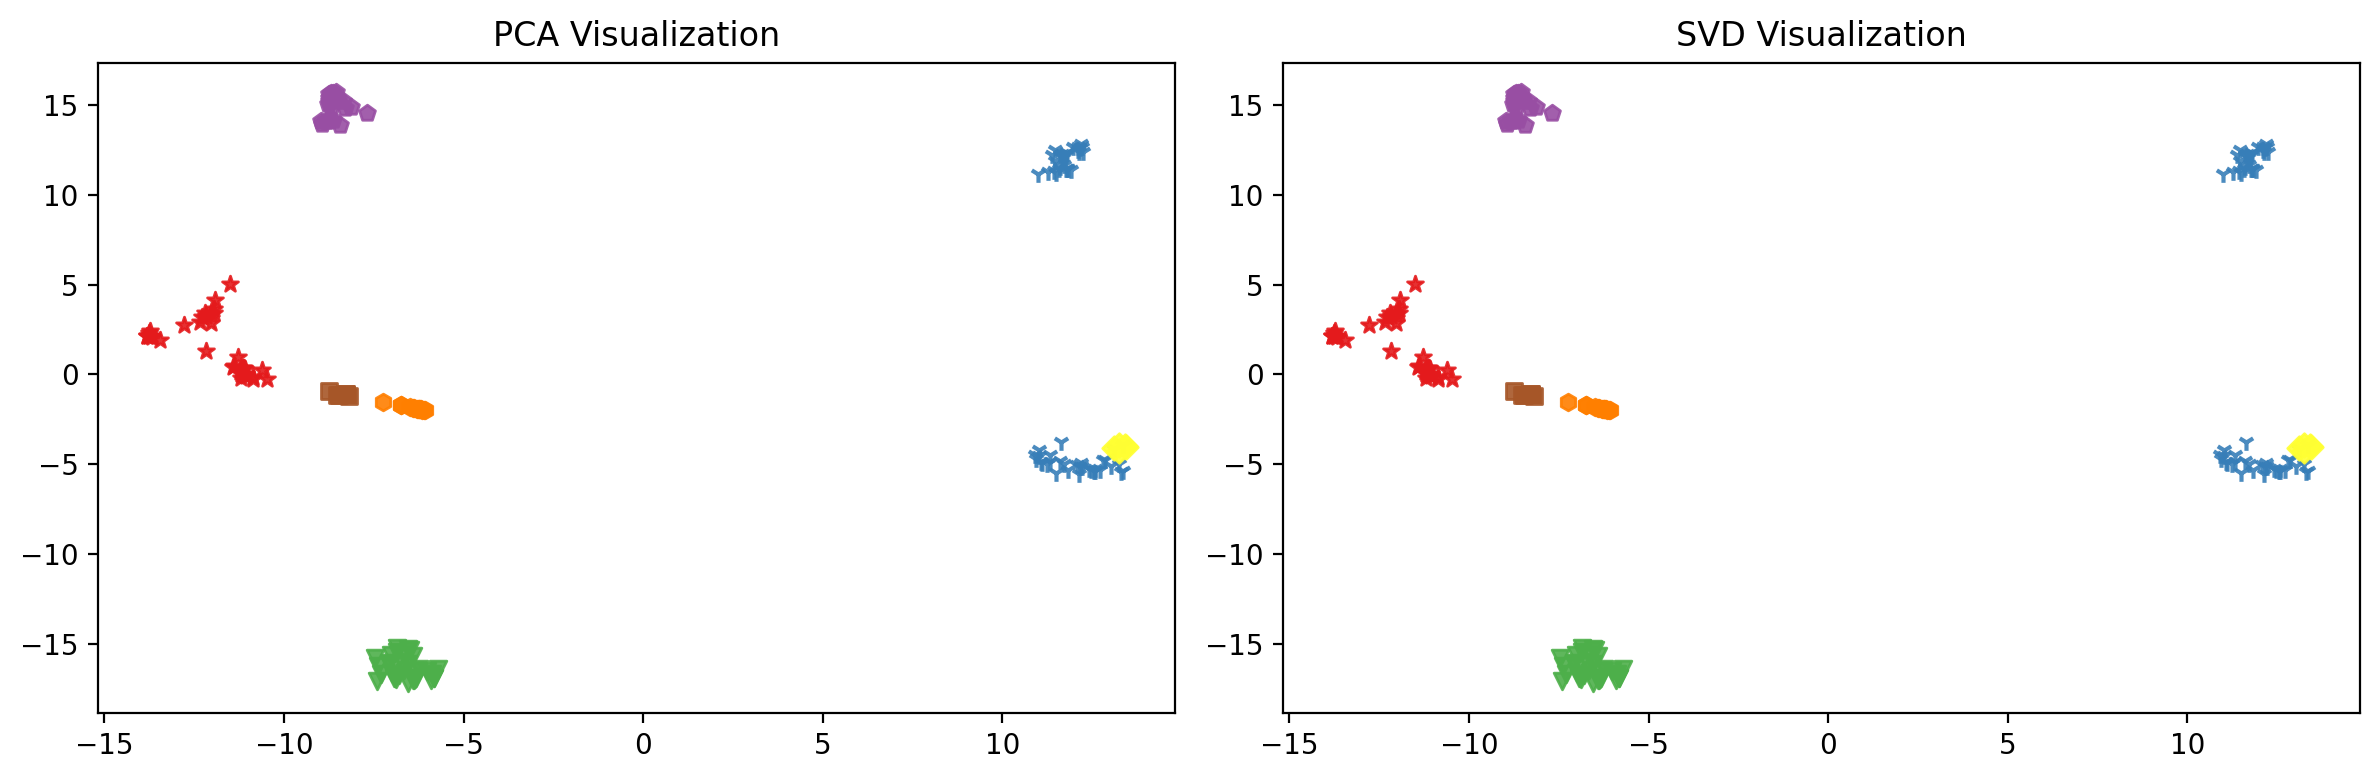

In [ ]:
graph(predictions_dbscan[0], predictions_dbscan[1], X, cluster_colors)

## Implementación DBSCAN desde 0

In [ ]:
# Pruebas
#eps: la distancia maxima a la que busco.
#min_samples: # de nodos que debe tener como minimo una clase
class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def fit_predict(self, X):
        self.X = X
        self.labels = [-1] * len(X)
        cluster_label = 0

        for i in range(len(X)):
            if self.labels[i] != -1:
                continue

            neighbors = self._find_neighbors(i)

            #print(f'i: {i}, neighbors: {len(neighbors)}')

            if len(neighbors) < self.min_samples:
                #ruido
                self.labels[i] = -1
            else:
                set_neighbors = set(neighbors)
                cluster_label += 1
                self._expand_cluster(i, set_neighbors, cluster_label)

        return self.labels

    def _find_neighbors(self, i):
        neighbors = []
        for j in range(len(self.X)):
            if i != j and self._euclidean_distance(self.X[i], self.X[j]) <= self.eps:
                neighbors.append(j)
        return neighbors

    def _expand_cluster(self, i, set_neighbors, cluster_label):
        self.labels[i] = cluster_label

        while set_neighbors:
            neighbor = set_neighbors.pop()

            if self.labels[neighbor] == -1:
                self.labels[neighbor] = cluster_label
                new_neighbors = self._find_neighbors(neighbor)

                if len(new_neighbors) >= self.min_samples:
                    # agrego nuevos vecinos a la lista de vecinos
                    set_neighbors.update(new_neighbors.copy())

    def _euclidean_distance(self, a, b):
        return ((a - b) ** 2).sum() ** 0.5


In [ ]:

dbscan = DBSCAN(eps=90, min_samples=3)


pca_idx = dbscan.fit_predict(X_pca)
svd_idx =  dbscan.fit_predict(X_svd)

# print
#print("PCA Clusters:")
#printCluster(target, pca_idx)
#print("\nSVD Clusters:")
#printCluster(target, svd_idx)

# scores
df_kmeans_scores = getScores(labels_true, pca_idx, svd_idx, X_pca, X_svd)
df_kmeans_scores

,Silhouette,Rand,Adjust Rand,Adjust Mutual Information
PCA,0.305494,0.927277,0.756876,0.86167
SVD,0.305563,0.927277,0.756876,0.86167


# Agglomerative Hierarchical Clustering

## implementación

In [ ]:
predictions_agglomerative = []

for method, data in zip(["PCA", "SVD"], [X_pca, X_svd]):
    cluster = AgglomerativeClustering(n_clusters=7)
    prediction = cluster.fit_predict(data)
    predictions_agglomerative. append(prediction)
    print (method)
    printCluster(target, prediction)


PCA
cerebellum: [1, 4, 6]
colon: [5]
endometrium: [0]
hippocampus: [1]
kidney: [0, 6]
liver: [3, 6]
placenta: [2]
{'cerebellum': [1, 4, 6], 'colon': [5], 'endometrium': [0], 'hippocampus': [1], 'kidney': [0, 6], 'liver': [3, 6], 'placenta': [2]}
SVD
cerebellum: [1, 4, 6]
colon: [5]
endometrium: [0]
hippocampus: [1]
kidney: [0, 6]
liver: [3, 6]
placenta: [2]
{'cerebellum': [1, 4, 6], 'colon': [5], 'endometrium': [0], 'hippocampus': [1], 'kidney': [0, 6], 'liver': [3, 6], 'placenta': [2]}


## scores

In [ ]:
df_scores_agglomerative = getScores(labels_true, predictions_agglomerative[0], predictions_agglomerative[1], X_pca, X_svd)
df_scores_agglomerative

,Silhouette,Rand,Adjust Rand,Adjust Mutual Information
PCA,0.328976,0.939716,0.790985,0.859905
SVD,0.329031,0.939716,0.790985,0.859905


## grafica

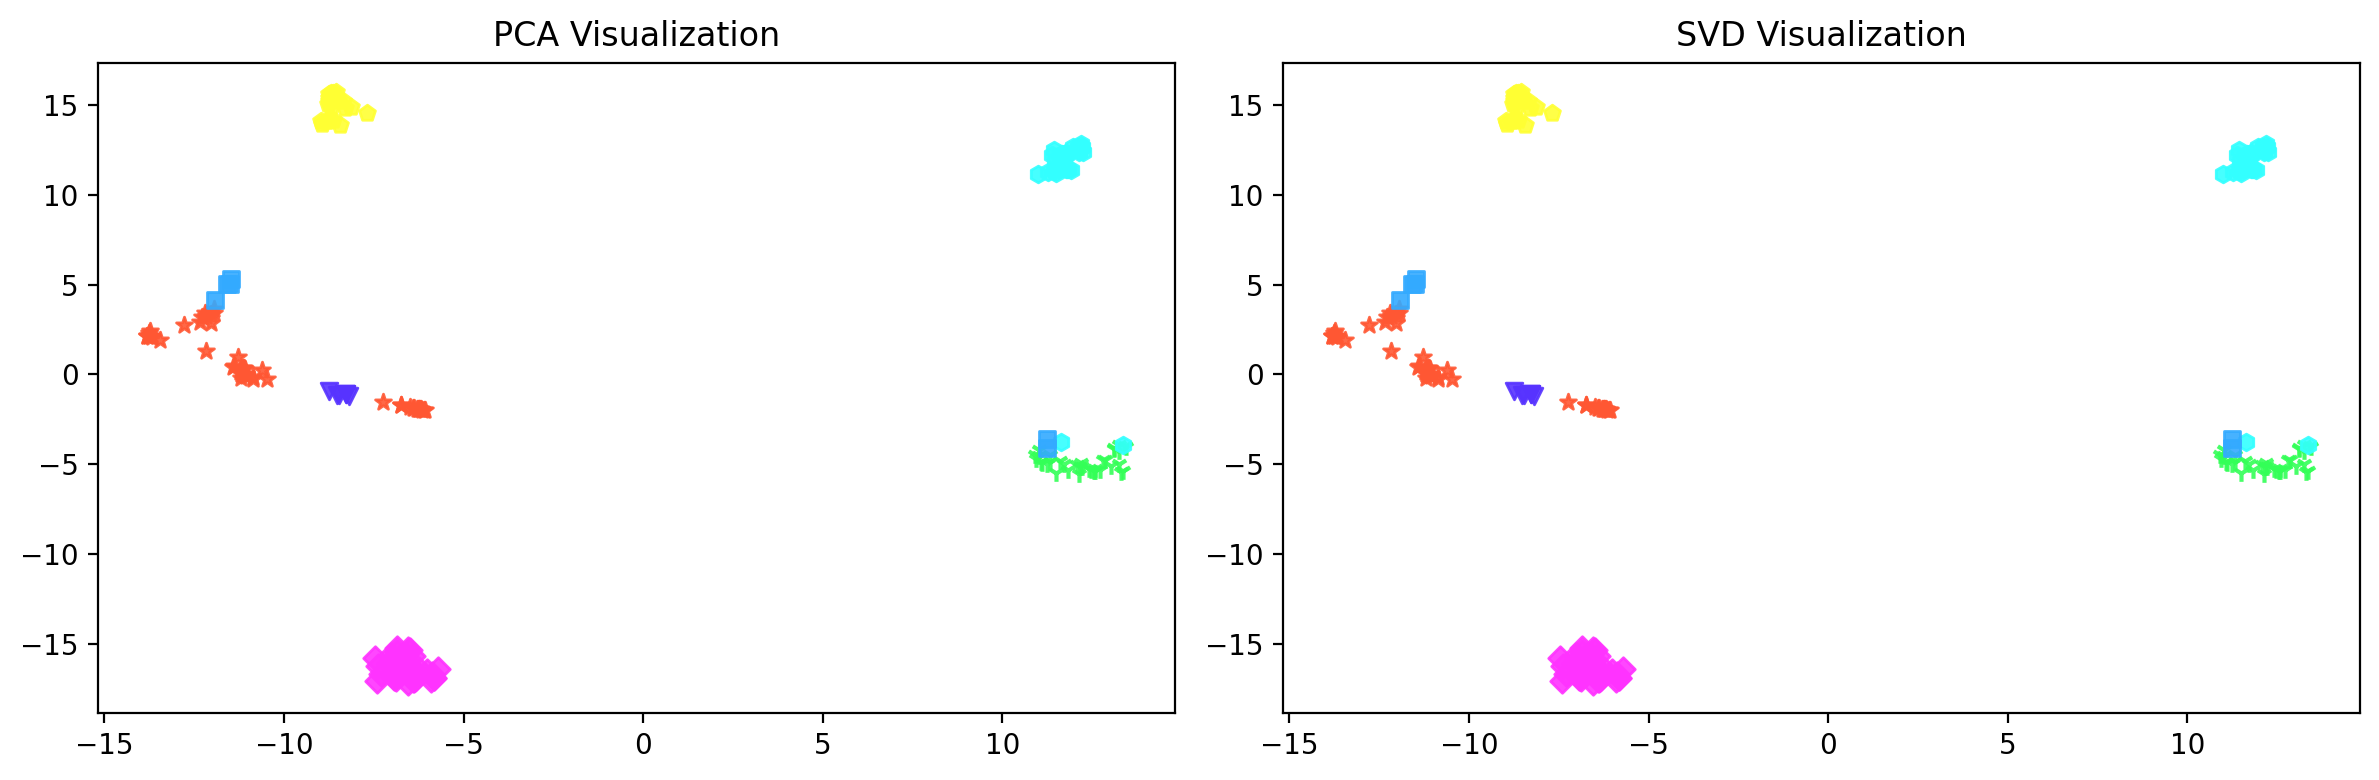

In [ ]:
graph (predictions_agglomerative[0], predictions_agglomerative[1], X, cluster_colors)

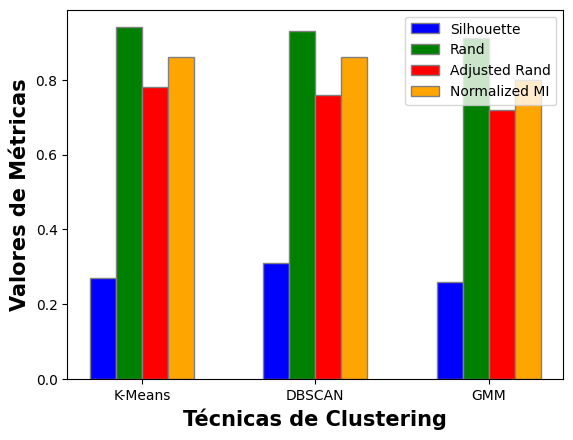

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Definir las técnicas de clustering y sus valores de métricas
tecnicas = ['K-Means', 'DBSCAN', 'GMM']
silhouette_scores = [0.27, 0.31, 0.26]
rand_scores = [0.94, 0.93, 0.91]
adjusted_rand_scores = [0.78, 0.76, 0.72]
normalized_mutual_info_scores = [0.86, 0.86, 0.80]

# Ancho de las barras
barWidth = 0.15

# Posiciones de las barras en el eje x
r1 = np.arange(len(silhouette_scores))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Crear el gráfico de barras
plt.bar(r1, silhouette_scores, color='b', width=barWidth, edgecolor='grey', label='Silhouette')
plt.bar(r2, rand_scores, color='g', width=barWidth, edgecolor='grey', label='Rand')
plt.bar(r3, adjusted_rand_scores, color='r', width=barWidth, edgecolor='grey', label='Adjusted Rand')
plt.bar(r4, normalized_mutual_info_scores, color='orange', width=barWidth, edgecolor='grey', label='Normalized MI')

# Personalizar el gráfico
plt.xlabel('Técnicas de Clustering', fontweight='bold', fontsize=15)
plt.xticks([r + barWidth*1.5 for r in range(len(silhouette_scores))], tecnicas)
plt.ylabel('Valores de Métricas', fontweight='bold', fontsize=15)
plt.legend()

# Mostrar el gráfico
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=405f8ffc-4055-4580-b6bc-5a8faf0085c3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>